In [ ]:
from pathlib import Path
import pandas as pd

model_name = "google/gemma-3-4b-it"
prompt = "How many cats are in this image? Answer only with a number."

data_file = Path("data") / "cats.csv"
df = pd.read_csv(data_file)
df.head()

,url,count
0,https://cdn.britannica.com/34/235834-050-C5843...,2
1,https://media.hswstatic.com/eyJidWNrZXQiOiJjb2...,3
2,https://lifelineanimal.org/wp-content/uploads/...,4
3,https://tenlives.com.au/wp-content/uploads/202...,7
4,https://i.pinimg.com/736x/e9/42/95/e942955ad1a...,6


**Load model and processor**

In [21]:
from src.gemma import load_model
from vl_saliency import SaliencyTrace

model, processor, device = load_model(model_name)
trace = SaliencyTrace(model, processor)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

**Helper Function**

In [123]:
import requests, torch
from io import BytesIO
from PIL import Image

from vl_saliency.viz import overlay
from src.gemma import process_inputs


def visualize_saliency(processor, image_url, count):
    inputs = process_inputs(processor, image_url, prompt, device)
    generated_ids = process_inputs(processor, image_url, prompt, device, count)["input_ids"]
    
    resp = requests.get(image_url)
    image = Image.open(BytesIO(resp.content))

    trace.capture(**inputs, generated_ids=generated_ids)
    trace._image_patches = [t.detach().to(torch.long).cpu() for t in trace._image_patches]

    saliency_map = trace.map(token=276, method="agcam", layers=[0])
    
    fig = overlay(saliency_map, image, title=f"{count} Cats", alpha=0.8)
    return fig

**Saliency Maps**

In [115]:
rows = df.itertuples(index=False)

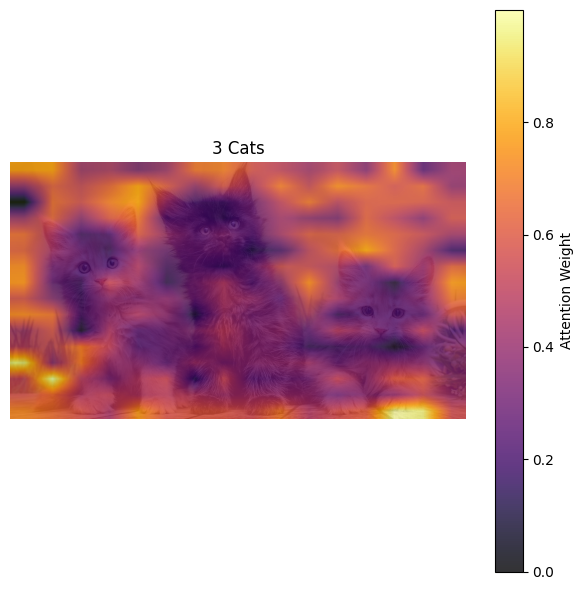

In [124]:
# url, count = next(rows)
fig = visualize_saliency(processor, url, count)
fig.show()

resp = requests.get(url)
image = Image.open(BytesIO(resp.content))

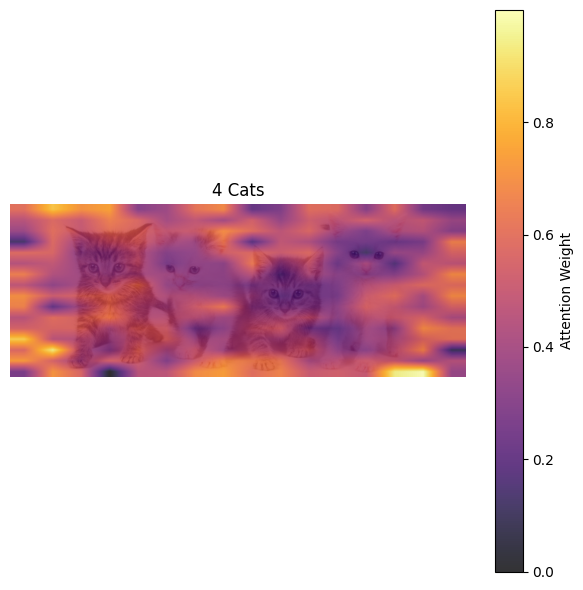

In [125]:
url, count = next(rows)
fig = visualize_saliency(processor, url, count)
fig.show()

resp = requests.get(url)
image = Image.open(BytesIO(resp.content))